## Correlação Cruzada - biblioteca Scipy  signal.correlate2d

### Passos para simulação de template matching que tem como objetivo encontrar a localização do olho direito da modelo (Lena) da imagem alvo:

#### Template e imagem alvo:
- Leitura da imagem alvo em escala de cinza
- Cópia de uma região de interesse da imagem alvo, que será o template
- Ambos template e imagem alvo devem ser convertidos para array

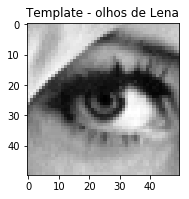

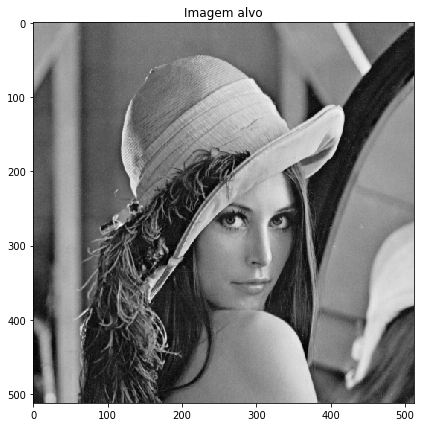

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import signal

img = mpimg.imread('../figures/lena_greyscale.png')
arr = np.asarray(img)
template = np.copy(arr[240:290, 240:290])

#plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.title('Template - olhos de Lena')
plt.imshow(template, cmap='gray')
#plt.axis(off)

plt.figure(figsize=(15,10))
plt.subplot(1,2,2)
plt.title('Imagem alvo')
plt.imshow(arr, cmap='gray')
plt.show()

#### Encontrar a correspondência, através da correlação cruzada
- calcular a média do array da imagem alvo e subtraí-la da imagem alvo
- calcular a média do template e subtraí-la do template
- Utilizar a função **signal.correlate2d** do Scipy para calcular a correlação cruzada entre a imagem alvo e o template, passando como parâmetro: a imagem alvo, o template, boundary='symm' que indica condições de contorno simétricas, mode='same' que indica que a saída é do mesmo tamanho que a imagem alvo e centralizada em relação à saída "completa".
- Encontrar as coordenadas onde está localizada a correspondencia, através do índices dos valores máximos ao longo do eixo x e y.

In [26]:
arr = arr - arr.mean()
template -= template.mean()
#arr = arr + np.random.randn(*arr.shape) * 100  # add noise
corr = signal.correlate2d(arr, template, boundary='fill', mode='same')
y, x = np.unravel_index(np.argmax(corr), corr.shape)  # Encontrar a correspondencia: Converte um índice simples ou uma matriz de índices simples em uma tupla de matrizes de coordenadas
print(np.argmax(corr))
print(corr.shape)
print(y,x)
#print(template)
#print(corr)
#plt.imshow(template, cmap='gray')


135432
(512, 512)
264 264


### Plotando os resultados
- Exibir a corrêspondecia através de um marcador vermelho das coordenadas x e y calculadas acima

C:\Users\le-rc\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


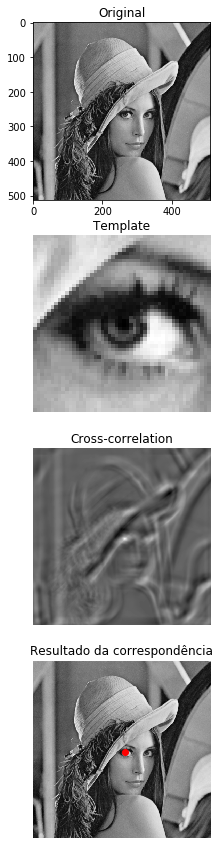

In [27]:
fig, (ax_orig, ax_template, ax_corr, ax_result) = plt.subplots(4, 1, figsize=(6, 15))
ax_orig.imshow(arr, cmap='gray')
ax_orig.set_title('Original')
#ax_orig.set_axis_off()

ax_template.imshow(template, cmap='gray')
ax_template.set_title('Template')
ax_template.set_axis_off()

ax_corr.imshow(corr, cmap='gray')
ax_corr.set_title('Cross-correlation')
ax_corr.set_axis_off()

ax_result.imshow(img, cmap='gray')
ax_result.set_title('Resultado da correspondência')
ax_result.set_axis_off()

ax_result.plot(x, y, 'ro')
fig.show()

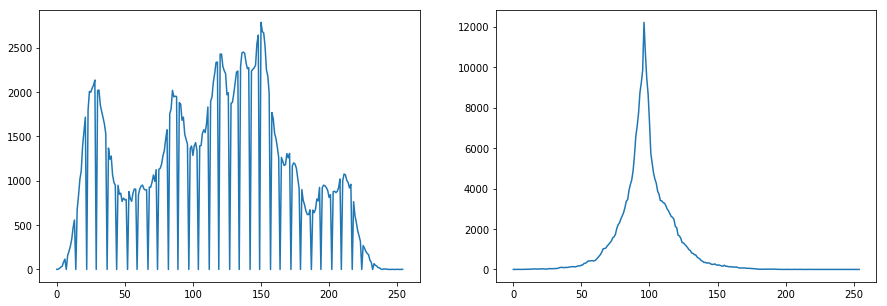

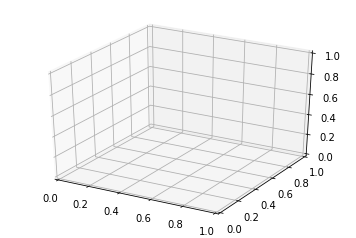

In [8]:
%matplotlib inline
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
h1,g2=np.histogram(arr,bins=255)
h2,g2=np.histogram(corr,bins=255)
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h1)
plt.subplot(1,2,2)
plt.plot(h2)
plt.show()
plt.axes(projection='3d')


In [6]:
import timeit
t = timeit.Timer('char in text', setup='text = "sample string"; char = "g"')
t.timeit()

0.0490500504241993

In [10]:
%timeit 1+1

11.7 ns ± 0.153 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)
